In [1]:
# imports 
import emp_preprocessing as ep
import emp_fake_data as ef
import emp_metrics as em
import emp_graphics as eg
import networkx as nx
import graphics as gx
import functions as fct
import numpy as np
import pandas as pd
import parameters as par

# parameters
agg_periods = [1, 50, 100, 250]
path_results = "./results/empirical_results/"

# 1 data preprocessing

In [ ]:
# load fake data (mmsr)
df_mmsr = ef.get_df_mmsr(nb_tran=int(1e4))
dic_obs_matrix_reverse_repo = ep.build_from_mmsr(df_mmsr=df_mmsr)

In [2]:
# load fake data (exposure)
df_exposures = ef.get_df_exposures(lines=int(1e5))
dic_obs_matrix_reverse_repo = ep.build_from_exposures(df_exposures=df_exposures)

100%|██████████| 100000/100000 [00:32<00:00, 3037.44it/s]


In [ ]:
# load real data 
df_exposures = pd.read_stata("to be filled")
dic_obs_matrix_reverse_repo = ep.build_from_exposures(df_exposures=df_exposures)

In [2]:
# pickle (faster)
dic_obs_matrix_reverse_repo = ep.load_dic_obs_matrix_reverse_repo()

# 2 metrics measurement

In [5]:
# get aggregated adjency matrices
dic_arr_binary_adj = ep.build_rolling_binary_adj(dic_obs_matrix_reverse_repo, agg_periods)

In [3]:
# pickle (faster)
dic_arr_binary_adj = ep.load_dic_arr_binary_adj()

## 2.1 jaccard

In [4]:
days = list(dic_obs_matrix_reverse_repo.keys())

# get jaccard
df_jaccard = em.get_jaccard(dic_arr_binary_adj, days)
eg.plot_jaccard_aggregated(df_jaccard, path_results)

compute jaccard


100%|██████████| 20833/20833 [00:07<00:00, 2916.85it/s]


In [7]:
for i in range(98,100):
    print(i)

98
99


In [11]:
import pickle

bank_id_off_balance_repos = pickle.load(open("./support/bank_id_off_balance_repos.pickle","rb"))
bank_id_on_balance_repos = pickle.load(open("./support/bank_id_on_balance_repos.pickle","rb"))

In [13]:
bank_id_on_balance_repos

{0: 0.0,
 1: 14.520543733582313,
 2: 0.0,
 3: 0.0,
 4: 0.0,
 5: 5.329070518200751e-15,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 0.0,
 11: 0.0,
 12: 6.944290470278796,
 13: 0.0,
 14: 0.0,
 15: 0.0,
 17: 0.0,
 18: 6.434186907133558,
 19: 0.0,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 0.0,
 26: 0.0,
 27: 0.0,
 28: 0.0,
 29: 0.0,
 30: 0.0,
 31: 0.0,
 32: 0.0,
 33: 0.0,
 34: 0.0,
 35: 0.0,
 36: 0.0,
 37: 0.0,
 38: 0.0,
 39: 0.0,
 40: 0.0,
 41: 0.0,
 42: 0.0,
 43: 0.0,
 44: 0.0,
 45: 0.0,
 46: 0.0,
 47: 0.0,
 48: 0.0,
 49: 0.0}

## 2.2 density

In [4]:
days = list(dic_obs_matrix_reverse_repo.keys())

# get density
df_density = em.get_density(dic_arr_binary_adj, days)
eg.plot_network_density(df_density, path_results)

compute density


100%|██████████| 20833/20833 [00:06<00:00, 3078.70it/s]


## 2.3 distribution of in and out degree

In [8]:
bank_ids = list(list(dic_obs_matrix_reverse_repo.values())[0].index)
days = list(dic_obs_matrix_reverse_repo.keys())

# get degree distribution
dic_in_degree, dic_out_degree = em.get_degree_distribution(dic_arr_binary_adj,bank_ids)
eg.plot_degree_distribution(dic_in_degree,
    dic_out_degree,
    f"{path_results}degree_distribution/",
    name="degree_distribution_reverse_repos",
    save_every=1000)


## 2.4 degree per asset

In [9]:
# build finrep data @NA: add here a read csv of the data with the total assets
df_finrep = ef.get_df_finrep()

# build df_banks
df_banks_emp = em.build_df_banks_emp(df_finrep,dic_in_degree,dic_out_degree,path_results)

# plot
gx.plot_step_degree_per_asset(df_banks_emp, agg_periods, path_results)

## 2.5 core periphery

In [4]:
arr_obs_matrix_reverse_repo = ep.convert_dic_to_array(dic_obs_matrix_reverse_repo)
days = list(dic_obs_matrix_reverse_repo.keys())

# run cp tests
eg.mlt_run_n_plot_cp_test(dic_arr_binary_adj, algos=par.cp_algos,save_every=1000, days=days, path_results=path_results, opt_agg=True)
eg.mlt_run_n_plot_cp_test(arr_obs_matrix_reverse_repo, algos=par.cp_algos,save_every=1000, days=days, path_results=path_results, opt_agg=False)

/mnt/live/user/vlecoz/Secured_interbank_network/emp_graphics.py:143: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_pvalue = pd.Series()
/mnt/live/user/vlecoz/conda_env/money_markets/lib/python3.8/site-packages/cpnet/qstest.py:94: UserWarning: 'num_of_thread keyword' is duplicated due to a compatibility issue with numba. Only one CPU will be used.
  warnings.warn("'num_of_thread keyword' is duplicated due to a compatibility issue with numba. Only one CPU will be used.")
100%|██████████| 100/100 [00:00<00:00, 191.43it/s]
/mnt/live/user/vlecoz/conda_env/money_markets/lib/python3.8/site-packages/cpnet/qstest.py:94: UserWarning: 'num_of_thread keyword' is duplicated due to a compatibility issue with numba. Only one CPU will be used.
  warnings.warn("'num_of_thread keyword' is duplicated due to a compatibility issue with numba. Only one CPU will be used.")
100%|██████████| 

# 3 tools

## 3.1 examples of density / histogram in log - log

### pareto law

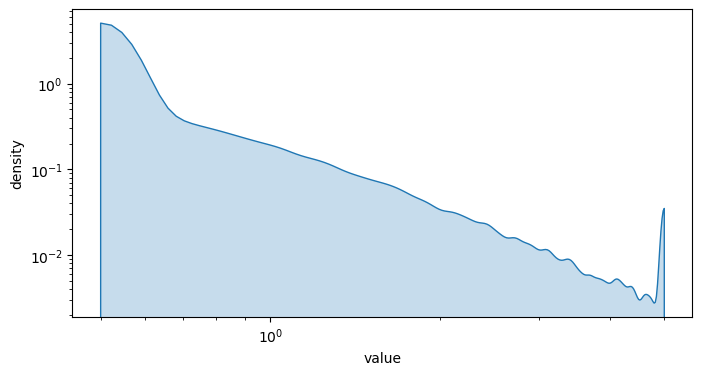

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate random data
x = np.random.pareto(3,size=100000)

# Compute the absolute value and sign of the data
abs_x = np.abs(x)
sign_x = np.sign(x)

# Set up the figure
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the KDE on a log scale with the transformed data
sns.kdeplot(x.clip(0.5,5), ax=ax, cut=0, fill=True)
ax.set_xscale('log')

# Set the y-axis to log scale
ax.set_yscale('log')

# Set axis labels
ax.set_xlabel('value')
ax.set_ylabel('density')

# Show the plot
plt.show()

### student law

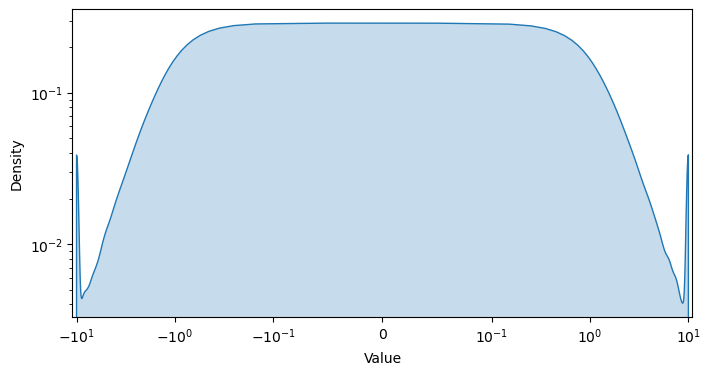

In [166]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate random data
x = np.random.standard_t(1,size=100000)

# Compute the absolute value and sign of the data
abs_x = np.abs(x)
sign_x = np.sign(x)

# Set up the figure
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the KDE on a log scale with the transformed data
sns.kdeplot(x.clip(-10,10), ax=ax, fill=True, cut=0)
ax.set_xscale('symlog', linthresh=0.1)

# Set the y-axis to log scale
ax.set_yscale('log')

# Set axis labels
ax.set_xlabel('Value')
ax.set_ylabel('Density')

# Show the plot
plt.show()

## 3.2 multiple histogram on the same plot

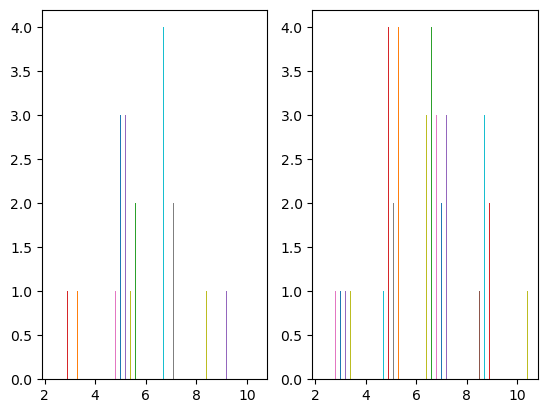

In [7]:
from matplotlib import pyplot as plt

fig, (ax1,ax2) = plt.subplots(1,2)
pos = 0
width = 0.2
for  i in range(10):
    binary_adj = np.random.randint(0,2,(10,10))
    bank_network = nx.from_numpy_array(
                binary_adj,
                parallel_edges=False,
                create_using=nx.DiGraph,
            )  # first define a networkx object.
    ar_in_degree = np.array(bank_network.in_degree())[:,1]
    hist = np.unique(ar_in_degree, return_counts=True)
    ax1.bar(hist[0] + pos, hist[1], width=0.01)
    ax2.bar(hist[0] + pos, hist[1], width=0.01)
    pos = pos +width +0.1



## 3.3 power low fitting

In [11]:
# fitting
import powerlaw
import numpy as np
data = np.random.pareto(3,size=1000) # data can be list or numpy array
fit = powerlaw.Fit(data)
print(fit.power_law.alpha)
print(fit.power_law.xmin)
R, p = fit.distribution_compare('power_law', 'exponential')

Calculating best minimal value for power law fit
/mnt/live/user/vlecoz/conda_env/money_markets/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /


2.806426031687078
0.8013075863209946


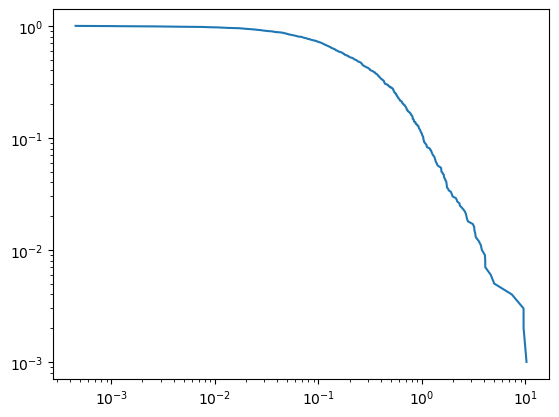

In [12]:
# plotting
ax1 = powerlaw.plot_ccdf(data)

/mnt/live/user/vlecoz/conda_env/money_markets/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /


<AxesSubplot: >

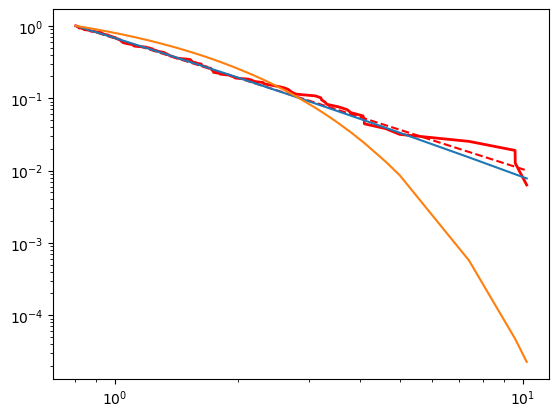

In [13]:
fig2 = fit.plot_ccdf(color = "r", linewidth = 2)
fit.power_law.plot_ccdf(color = "r", linestyle = "--", ax = fig2)
fit.lognormal.plot_ccdf(ax=fig2)
fit.exponential.plot_ccdf(ax=fig2)